Jamison Hunter

August 31, 2023

# Preparing Time Series from Wide-Form Data

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.ticker as mticks
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

Load in the Zillow Home Value Index dataframe

In [3]:
path = r"City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

In [4]:
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


Filter the 4 largest cities into a new dataframe.

In [5]:
# checking SizeRank column in order to get a sense of it
df["SizeRank"].unique()

array([    0,     1,     2, ..., 28413, 28415, 28439], dtype=int64)

In [6]:
bigCity = df.head(4)
bigCity = bigCity.drop(columns = ["RegionType", "StateName", "RegionID"])
bigCity = pd.melt(bigCity, id_vars = ["SizeRank", "RegionName", "State", "CountyName", "Metro"], var_name = "Date", value_name = "HomeValue")
bigCity["Date"] = bigCity['Date'] = pd.to_datetime(bigCity['Date'])
bigCity = bigCity.set_index("Date")

In [7]:
bigCity

,SizeRank,RegionName,State,CountyName,Metro,HomeValue
Date,,,,,,
2000-01-31,0,New York,NY,Queens County,"New York-Newark-Jersey City, NY-NJ-PA",253690.0
2000-01-31,1,Los Angeles,CA,Los Angeles County,"Los Angeles-Long Beach-Anaheim, CA",234181.0
2000-01-31,2,Houston,TX,Harris County,"Houston-The Woodlands-Sugar Land, TX",109068.0
2000-01-31,3,Chicago,IL,Cook County,"Chicago-Naperville-Elgin, IL-IN-WI",166139.0
2000-02-29,0,New York,NY,Queens County,"New York-Newark-Jersey City, NY-NJ-PA",255517.0
...,...,...,...,...,...,...
2022-08-31,3,Chicago,IL,Cook County,"Chicago-Naperville-Elgin, IL-IN-WI",315587.0
2022-09-30,0,New York,NY,Queens County,"New York-Newark-Jersey City, NY-NJ-PA",781622.0
2022-09-30,1,Los Angeles,CA,Los Angeles County,"Los Angeles-Long Beach-Anaheim, CA",966595.0


Melt the data to long-form and prepare it for time series analysis.
* Convert the melted dates into datetime datatype.
* Make the datetime column the index.

In [8]:
df = df.drop(columns = ["RegionType", "StateName", "RegionID"])
df.head(2)

,SizeRank,RegionName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,257207.0,260310.0,263204.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,235513.0,237589.0,240113.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0


In [9]:
melted = pd.melt(df, id_vars = ["SizeRank", "RegionName", "State", "CountyName", "Metro"], var_name = "Date", value_name = "Value")
melted

,SizeRank,RegionName,State,CountyName,Metro,Date,Value
0,0,New York,NY,Queens County,"New York-Newark-Jersey City, NY-NJ-PA",2000-01-31,253690.0
1,1,Los Angeles,CA,Los Angeles County,"Los Angeles-Long Beach-Anaheim, CA",2000-01-31,234181.0
2,2,Houston,TX,Harris County,"Houston-The Woodlands-Sugar Land, TX",2000-01-31,109068.0
3,3,Chicago,IL,Cook County,"Chicago-Naperville-Elgin, IL-IN-WI",2000-01-31,166139.0
4,4,San Antonio,TX,Bexar County,"San Antonio-New Braunfels, TX",2000-01-31,114794.0
...,...,...,...,...,...,...,...
6133486,28439,Palisades,TX,Randall County,"Amarillo, TX",2022-09-30,192110.0
6133487,28439,Port Mansfield,TX,Willacy County,"Raymondville, TX",2022-09-30,264685.0
6133488,28439,Tribes Hill,NY,Montgomery County,"Amsterdam, NY",2022-09-30,142438.0
6133489,28439,Derby Center,VT,Orleans County,NaN,2022-09-30,266255.0


In [10]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133491 entries, 0 to 6133490
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   SizeRank    int64         
 1   RegionName  object        
 2   State       object        
 3   CountyName  object        
 4   Metro       object        
 5   Date        datetime64[ns]
 6   Value       float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 327.6+ MB


In [11]:
melted = melted.set_index("Date")
melted.head(3)

,SizeRank,RegionName,State,CountyName,Metro,Value
Date,,,,,,
2000-01-31,0,New York,NY,Queens County,"New York-Newark-Jersey City, NY-NJ-PA",253690.0
2000-01-31,1,Los Angeles,CA,Los Angeles County,"Los Angeles-Long Beach-Anaheim, CA",234181.0
2000-01-31,2,Houston,TX,Harris County,"Houston-The Woodlands-Sugar Land, TX",109068.0


Resample the dataframe as monthly frequency, grouped by City.

In [12]:
df_ts = bigCity.groupby('RegionName').resample("M").sum()
df_ts

SizeRank  HomeValue
RegionName Date                           
Chicago    2000-01-31         3   166139.0
           2000-02-29         3   166536.0
           2000-03-31         3   167368.0
           2000-04-30         3   168826.0
           2000-05-31         3   170499.0
...                         ...        ...
New York   2022-05-31         0   768797.0
           2022-06-30         0   773944.0
           2022-07-31         0   777692.0
           2022-08-31         0   779960.0
           2022-09-30         0   781622.0

[1092 rows x 2 columns]

In [13]:
unstacked = df_ts.unstack(level=0)
unstacked = unstacked.drop(columns = ["SizeRank"])
unstacked = unstacked.interpolate()
unstacked

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [14]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1000
    return f"{new_x:,.0f}K"
# Create the formatter
fmt_thous = mticks.FuncFormatter(thousands)

Text(0, 0.5, 'Home Price')

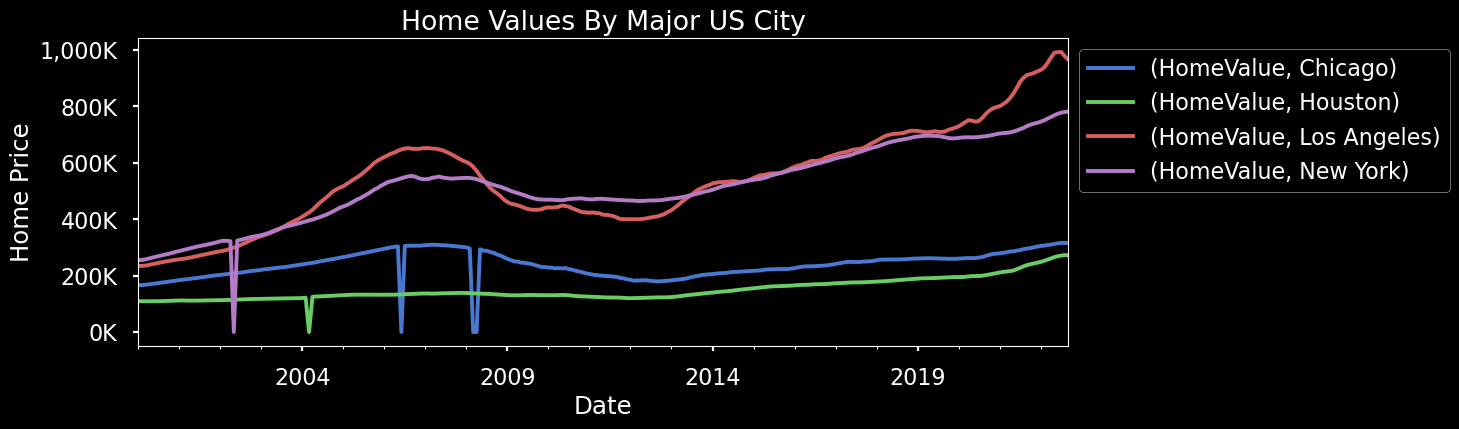

In [15]:
ax = unstacked.plot(figsize=(12,4));
ax.yaxis.set_major_formatter(fmt_thous)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
ax.legend(bbox_to_anchor=[1,1])
ax.set_title("Home Values By Major US City")
ax.set_ylabel("Home Price")

#Answer the following 2 questions using pandas:
1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.

2) How much did the home values change from November 2008 to December 2008 (in dollars)?
Hint: you can use .diff() to calculate the change in values

In [16]:
ts = unstacked.resample("Y").sum()
ts = ts.loc["2008"]
ts

HomeValue                                  
RegionName    Chicago    Houston Los Angeles   New York
Date                                                   
2008-12-31  2841514.0  1621957.0   6428208.0  6369530.0

Text(0.5, 1.0, '2008 Average Home Values')

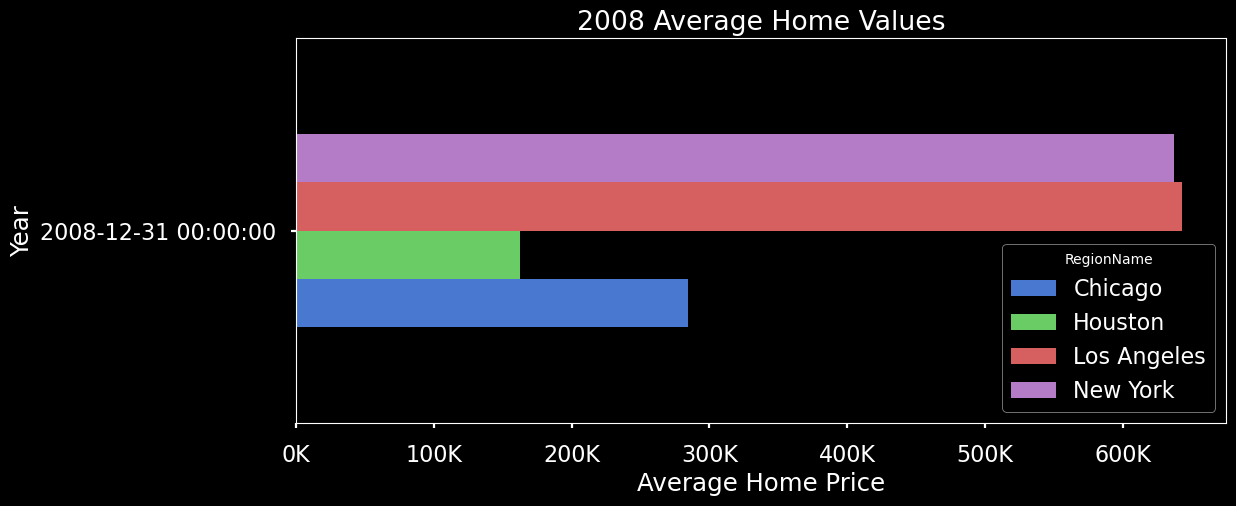

In [17]:
def thousand(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/10000
    return f"{new_x:,.0f}K"
# Create the formatter
fmt = mticks.FuncFormatter(thousand)

ax = ts["HomeValue"].plot(kind = "barh", figsize = (12,5))
ax.xaxis.set_major_formatter(fmt)
ax.set_xlabel("Average Home Price")
ax.set_ylabel("Year")
ax.set_title("2008 Average Home Values")

We can see that Los Angeles had the highest home values at the end of 2008 while Houston had the lowest home values at the end of 2008.

In [18]:
ts = unstacked.copy()
ts = ts.loc["2008-11-30" : "2008-12-31"]
ts

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2008-11-30  271059.0  132247.0    481905.0  514767.0
2008-12-31  265306.0  131283.0    469294.0  510309.0

In [19]:
ts.diff()

HomeValue                             
RegionName   Chicago Houston Los Angeles New York
Date                                             
2008-11-30       NaN     NaN         NaN      NaN
2008-12-31   -5753.0  -964.0    -12611.0  -4458.0

Above can be seen the decreases in housing prices between November 2008 and December 2008.